# **Fashion Product Unsupervised Learning**

## **Objective**
This notebook trains a **unsupervised learning model** to cluster **fashion product subcategories** based on image data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image


In [22]:
# Load dataset
df = pd.read_csv(r"C:\FashionRecommendationsSystem\Dataset\fashion_products_cleaned.csv")

# Drop class labels before clustering
df_unlabeled = df.drop(columns=["id", "subCategory"])

# Encode categorical features
encoder = LabelEncoder()
for col in df_unlabeled.select_dtypes(include=['object']).columns:
    df_unlabeled[col] = encoder.fit_transform(df_unlabeled[col])

# Scale numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unlabeled)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_unlabeled.columns)


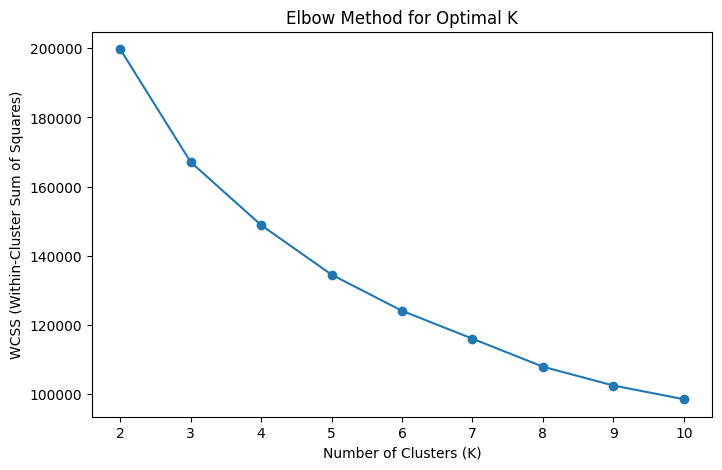

In [23]:
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to determine optimal clusters
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


In [24]:
optimal_k = 4  
# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original dataset
df["Cluster"] = df_scaled["Cluster"]

In [25]:
# Silhouette Score
silhouette_avg = silhouette_score(df_scaled.iloc[:, :-1], df_scaled["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.2115


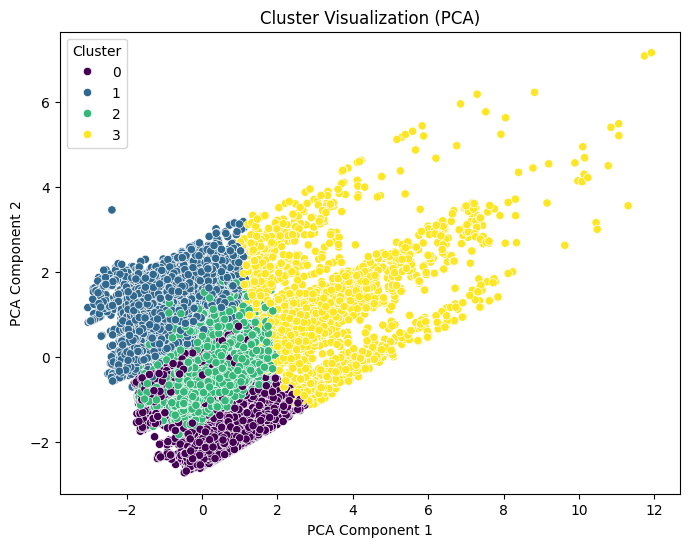

In [26]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.iloc[:, :-1])

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_scaled["Cluster"], palette="viridis")
plt.title("Cluster Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
#ResNet50 Model 
resnet_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

def extract_features(img_path):
    """
    Extracts deep features from an image using ResNet50.
    """
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = resnet_model.predict(img_array)
    return features.flatten()

In [28]:
image_folder = "C:/FashionRecommendationsSystem/Dataset/resized_images"

# Read image filenames from dataset
image_filenames = df["image_filename"].tolist()

image_features = []
valid_images = []

for img_filename in image_filenames:
    img_path = os.path.join(image_folder, img_filename)
    
    if os.path.exists(img_path):
        features = extract_features(img_path)
        image_features.append(features)
        valid_images.append(img_filename)  

image_features = np.array(image_features)

pca_images = PCA(n_components=8)
image_features_reduced = pca_images.fit_transform(image_features)

# Apply K-Means
kmeans_images = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
image_clusters = kmeans_images.fit_predict(image_features_reduced)

image_cluster_df = pd.DataFrame({"image_filename": valid_images, "Cluster": image_clusters})


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [29]:
def recommend_similar_items(image_path, top_n=5):
    """
    Predicts the cluster of an input image and recommends similar products.
    """
    # Extract image features
    img_features = extract_features(image_path).reshape(1, -1)
    img_features_reduced = pca_images.transform(img_features)

    # Predict the cluster using K-Means for images
    predicted_cluster = kmeans_images.predict(img_features_reduced)[0]

    print(f"Predicted Cluster: {predicted_cluster}")

    # Get all items in the same cluster
    same_cluster_items = image_cluster_df[image_cluster_df["Cluster"] == predicted_cluster]

    # Select top N recommendations
    recommended_items = same_cluster_items.sample(n=min(top_n, len(same_cluster_items)))

    print("\nRecommended Items:")
    recommended_images = []

    for i, row in recommended_items.iterrows():
        recommended_images.append(row["image_filename"])
        print(f"{i+1}. Image File: {row['image_filename']}")

    # Display input image and recommended items
    plt.figure(figsize=(12, 6))

    # Show input image
    plt.subplot(1, top_n + 1, 1)
    input_img = cv2.imread(image_path)
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.imshow(input_img)
    plt.axis("off")
    plt.title("Input Image")

    # Show recommended images
    for i, rec_img_name in enumerate(recommended_images):
        rec_img_path = os.path.join(image_folder, rec_img_name)
        rec_img = cv2.imread(rec_img_path)
        rec_img = cv2.cvtColor(rec_img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, top_n + 1, i + 2)
        plt.imshow(rec_img)
        plt.axis("off")
        plt.title(f"Recommendation {i+1}")

    plt.show()

    return recommended_images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Predicted Cluster: 0

Recommended Items:
4181. Image File: 7221.jpg
612. Image File: 41447.jpg
2169. Image File: 16168.jpg
27524. Image File: 4477.jpg
13783. Image File: 8962.jpg


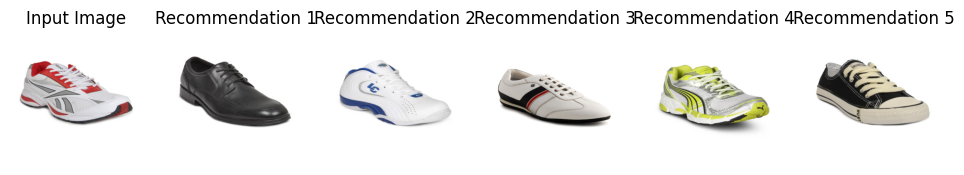

['7221.jpg', '41447.jpg', '16168.jpg', '4477.jpg', '8962.jpg']

In [ ]:
# Test with an Example Image 
image_path = "C:/FashionRecommendationsSystem/Dataset/resized_images/10078.jpg"

recommend_similar_items(image_path, top_n=5)